### Load packages 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

### Load Dataset

In [2]:
data = pd.read_csv('Dataset/Iris.csv')

# data = pd.get_dummies(data, columns=["Species"])

# # Decode the one-hot encoded columns to 0 and 1
# data["Species_Iris-setosa"] = data["Species_Iris-setosa"].apply(lambda x: 1 if x else 0)
# data["Species_Iris-versicolor"] = data["Species_Iris-versicolor"].apply(lambda x: 1 if x else 0)
# data["Species_Iris-virginica"] = data["Species_Iris-virginica"].apply(lambda x: 1 if x else 0)

# # Print the updated dataset
# data.head()

In [35]:
data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


splitting dataset to train data and test data (80%)

In [3]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
22,23,4.6,3.6,1.0,0.2,Iris-setosa
15,16,5.7,4.4,1.5,0.4,Iris-setosa
65,66,6.7,3.1,4.4,1.4,Iris-versicolor
11,12,4.8,3.4,1.6,0.2,Iris-setosa
42,43,4.4,3.2,1.3,0.2,Iris-setosa
...,...,...,...,...,...,...
71,72,6.1,2.8,4.0,1.3,Iris-versicolor
106,107,4.9,2.5,4.5,1.7,Iris-virginica
14,15,5.8,4.0,1.2,0.2,Iris-setosa
92,93,5.8,2.6,4.0,1.2,Iris-versicolor


we transform every label to a numerical data (from 0 to 2)

In [4]:
train_data['Species'] = train_data['Species'].replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})# type:ignore
test_data['Species'] = test_data['Species'].replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})# type:ignore


In [5]:
train_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
22,23,4.6,3.6,1.0,0.2,0
15,16,5.7,4.4,1.5,0.4,0
65,66,6.7,3.1,4.4,1.4,1
11,12,4.8,3.4,1.6,0.2,0
42,43,4.4,3.2,1.3,0.2,0
...,...,...,...,...,...,...
71,72,6.1,2.8,4.0,1.3,1
106,107,4.9,2.5,4.5,1.7,2
14,15,5.8,4.0,1.2,0.2,0
92,93,5.8,2.6,4.0,1.2,1


we create the input data for our nueral network and the output to calculate the error <br>
and generate randomly the weight for layer 1 and layer 2 (for now we have 1 hidden layer)

In [7]:
inputs , real_output = np.array(train_data.drop([ 'Id','Species'] , axis=1)) ,np.array(train_data['Species']).reshape((120,1))#type:ignore

weight_layer_1 =np.random.rand(inputs.shape[1] , 4)
weight_layer_2 =np.random.rand(4 , 1)


In [8]:
print(f"inputs shape {inputs.shape} output shape {real_output.shape}")
print(f"weight layer 1 : \n{weight_layer_1} \nweight_layer_2 : \n{weight_layer_2}")

inputs shape (120, 4) output shape (120, 1)
weight layer 1 : 
[[0.1833625  0.08612447 0.27823559 0.92637396]
 [0.5909788  0.58180576 0.11572032 0.44959413]
 [0.58266324 0.5723934  0.28965391 0.4827279 ]
 [0.76789514 0.64297642 0.44303089 0.30341513]] 
weight_layer_2 : 
[[0.05233241]
 [0.9131057 ]
 [0.50522359]
 [0.98261479]]


### Implimentation of the nueral network 
(with 4 input and 1 output and 1 hidden layer full connected)

In [9]:
def model(inputs , weights):
    return inputs.dot(weights)

In [10]:
def sigmoid (x):
    return 1/(1 + np.exp(-x))

In [11]:
def sigmoid_derivative (x):
    return (np.exp(x))/(np.exp(x)+1)**2

In [14]:
s = model(inputs , weight_layer_1)
os =  sigmoid(model(inputs , weight_layer_1))

s_1 = sigmoid(os)

if s_1.all() == s.all() :
    print('they are match ')



they are match 


In [102]:
def softmax(x):
    exp_x = np.exp(x)
    sum_exp_x = np.sum(exp_x, axis=1, keepdims=True)
    return exp_x / sum_exp_x

In [103]:
def softmax_derivative(x):
    """
    Compute the derivative of softmax function.
    
    Arguments:
    x -- A numpy array of shape (n, m).
    
    Returns:
    The derivative of the softmax function for the input x.
    """
    s = np.exp(x) / np.sum(np.exp(x), axis=0)
    ds = np.diagflat(s) - np.dot(s, s.T)
    return ds

In [104]:
def error(otput , real_output):
    return np.sqrt(np.square(np.subtract(otput, real_output)).mean())

def rmse(y_pred , y_true):

    n = y_true.shape[0]  # number of samples
    diff = y_pred - y_true  # difference between predicted and true values
    mse = (1/n) * np.sum(diff ** 2)  # mean squared error
    rmsee = np.sqrt(mse)  # root mean squared error
    return rmsee

def rmse_derivative(y_pred , y_true):
    N = y_true.shape[0]
    diff = y_pred - y_true
    mse = np.mean(diff ** 2)
    rmse = np.sqrt(mse)
    return diff / (rmse * N)

def d_rmse(y_pred , y_true):
    """
    Calculates the derivative of RMSE (Root Mean Squared Error) loss function with respect to y_pred
    
    Arguments:
    y_true -- true values of the output (ground truth)
    y_pred -- predicted values of the output
    
    Returns:
    derivative of RMSE loss function with respect to y_pred
    """
    n = y_true.shape[0]  # number of samples
    diff = y_pred - y_true  # difference between predicted and true values
    d_rmse = (2/n) * np.dot(diff.T, diff)  # derivative of RMSE w.r.t y_pred
    return d_rmse


In [105]:
hidden = sigmoid(model(inputs , weight_layer_1))
predicted_output = sigmoid(model(hidden , weight_layer_2))
predicted_output.shape , hidden.shape

((120, 1), (120, 4))

In [106]:
rmse_derivative(predicted_output , real_output ).shape

(120, 1)

In [107]:
def gradient (inputs , weight_layer_1 , weight_layer_2 , real_output ):
    
    hidden = sigmoid(model(inputs , weight_layer_1)) # OS1 shape ()
    
    predicted_output = sigmoid(model(hidden , weight_layer_2)) # OS2

    dE = rmse_derivative(predicted_output , real_output )

    dYp = sigmoid_derivative(model(hidden , weight_layer_2))
    dS2 = sigmoid_derivative(hidden)
    dOS = sigmoid_derivative(model(inputs , weight_layer_1))

    # d_output_1 = sigmoid_derivative(model(inputs , weight_layer_1))

    # print(f'dE : {dE.shape} dYp: {dYp.shape} d_output1: {d_output_1.shape} weight_layer_2 : {weight_layer_2.shape} weight_layer_1 {weight_layer_1.shape} hidden{hidden.shape} predicted_output{predicted_output.shape}')
    dw2 = np.dot(dE.T ,dYp.dot(weight_layer_2.T)).T.astype(float)
    dw1 = dE.dot(dYp.T).T.dot(dS2).T.dot(dOS).dot(weight_layer_1).astype(float)
    
    return  dw1 , dw2

In [108]:
test1 ,test2 = gradient(inputs , weight_layer_1 , weight_layer_2 , real_output)

In [109]:
def update (dw1 ,dw2 ,weight_layer_1 , weight_layer_2 ,learning_rate ):
    weight_layer_2  = weight_layer_2 - (learning_rate * dw2)
    weight_layer_1  = weight_layer_1 - (learning_rate * dw1)
    return weight_layer_1 ,weight_layer_2

In [110]:
# update(test1 ,test2  ,weight_layer_1 ,weight_layer_2 ,0.01)

algorithme to calculate the output and error and update the weight and recalculate 

In [111]:
def artificial_nueral(inputs , weight_layer_1 ,weight_layer_2 , real_output , epoch_number =60 , learning_rate = 0.01):
    cost = []
    import matplotlib.pylab as plt 
    for i in range(epoch_number):
        hidden = sigmoid(model(inputs ,weight_layer_1))
        predicted_output = sigmoid(model(hidden , weight_layer_2 ))
        cost.append(error(predicted_output , real_output ))
        dw1 , dw2 = gradient(inputs , weight_layer_1 , weight_layer_2 , real_output)
        weight_layer_1 , weight_layer_2 = update(dw1 ,dw2  ,weight_layer_1 ,weight_layer_2 ,learning_rate)
    plt.plot(cost)
    plt.show()
    return weight_layer_1 ,weight_layer_2

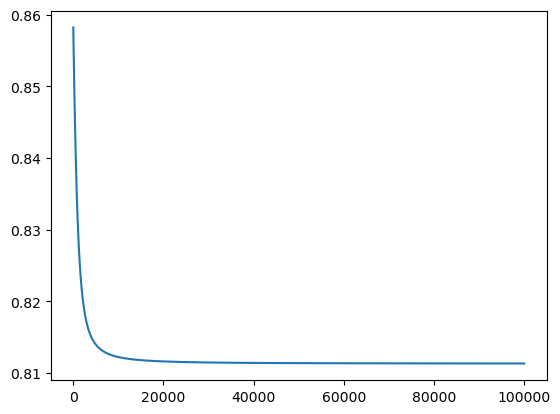

In [115]:
W1 , W2 = artificial_nueral(inputs ,weight_layer_1 ,weight_layer_2 ,real_output  ,99999)

the prediction function 

In [113]:
def predict(inputs , weight_layer_1 ,weight_layer_2):
  hidden = sigmoid(model(inputs ,weight_layer_1))
  predicted_output = sigmoid(model(hidden ,weight_layer_2))
  return predicted_output

In [114]:
inputs_test , real_output_test = np.array(test_data.drop([ 'Id','Species'] , axis=1)) ,np.array(test_data['Species']).reshape((30,1))#type:ignore

the error are big may to many reason and some of them is that we may want to add more layer or add bias 

In [117]:
predicted_value = predict(inputs_test ,W1 ,W2)
rmse(predicted_value , real_output_test)

0.8373655244895449